In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

arrhythmia_data = pd.read_csv('arrhythmia.data')
print(arrhythmia_data)
'''
1) demonstrate k-means clustering using the scikit learn package (50 points).... 
Calculate the sum of least square error for each different values of 'k'.
 
2) Using Matplotlib determine the optimal number of clusters (k) using the 
elbow method along with a brief explanation (50 points).

3) Finally plot the optimal clusters with their centroids along with a brief 
explanation (50 points). 

Comment your code as needed.'''

     75  0  190  80   91  193  371  174  121  -16  ... 0.0.38   9.0  -0.9  \
0    56  1  165  64   81  174  401  149   39   25  ...    0.0   8.5   0.0   
1    54  0  172  95  138  163  386  185  102   96  ...    0.0   9.5  -2.4   
2    55  0  175  94  100  202  380  179  143   28  ...    0.0  12.2  -2.2   
3    75  0  190  80   88  181  360  177  103  -16  ...    0.0  13.1  -3.6   
4    13  0  169  51  100  167  321  174   91  107  ...   -0.6  12.2  -2.8   
..   .. ..  ...  ..  ...  ...  ...  ...  ...  ...  ...    ...   ...   ...   
446  53  1  160  70   80  199  382  154  117  -37  ...    0.0   4.3  -5.0   
447  37  0  190  85  100  137  361  201   73   86  ...    0.0  15.6  -1.6   
448  36  0  166  68  108  176  365  194  116  -85  ...    0.0  16.3 -28.6   
449  32  1  155  55   93  106  386  218   63   54  ...   -0.4  12.0  -0.7   
450  78  1  160  70   79  127  364  138   78   28  ...    0.0  10.4  -1.8   

    0.0.39 0.0.40  0.9.2  2.9.1  23.3  49.4   8  
0      0.0    0.0    0.2 

"\n1) demonstrate k-means clustering using the scikit learn package (50 points).... \nCalculate the sum of least square error for each different values of 'k'.\n \n2) Using Matplotlib determine the optimal number of clusters (k) using the \nelbow method along with a brief explanation (50 points) . \n\n3) Finally plot the optimal clusters with their centroids along with a brief \nexplanation (50 points). \n\nComment your code as needed."

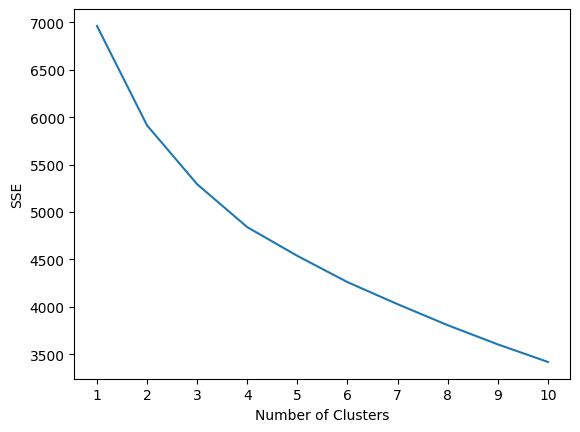

The SSE for 4 clusters is: 4840.924749298424


In [130]:
#There are column/row values containing string '?', replace with NaN, and drop.
arrhythmia_data = arrhythmia_data.replace('?',np.nan)
arrhythmia_data = arrhythmia_data.dropna()

#Scale for clustering
scaled_arrhythmia_data = StandardScaler().fit_transform(arrhythmia_data)
#check to see if scaling worked
#print(scaled_arrhythmia_data[:5])

#Set kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#Create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_arrhythmia_data)
    sse.append(kmeans.inertia_)
    
#Visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#Okay so it looks like 4 clusters is about where the "elbow" is.
#The elbow should indicate where the distance between points of a cluster
#and their centroid gets smaller (so we have more distinct clusters).
#It would be nice if the elbow were clearer, but this is what I got.

#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_arrhythmia_data)

#Now to print the SSE for 4 clusters:
z = kmeans.inertia_
print("The SSE for 4 clusters is: " + str(z))

#view cluster assignments for each observation
arrhythmia_data['cluster'] = kmeans.labels_
#print(arrhythmia_data)

In [129]:
#Scale for clustering
scaled_arrhythmia_data = StandardScaler().fit_transform(arrhythmia_data)
#check to see if scaling worked
#print(scaled_arrhythmia_data[:5])

#Set kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#Create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_arrhythmia_data)
    sse.append(kmeans.inertia_)

#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=10, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_arrhythmia_data)

#Now to print the SSE for 10 clusters:
z = kmeans.inertia_
print("The SSE for 10 clusters is: " + str(z))

The SSE for 10 clusters is: 3419.177000683553


(array([[  3.89011024,  -9.48874989,  -5.18357192],
       [  6.78138881,  -4.65629959,   5.90991962],
       [  9.10801502,   8.70145149,   0.69290433],
       [  4.1598042 , -10.93579293,  -5.22333626],
       [ -9.22383257,   6.94304137,  -6.34421086],
       [  4.0582217 ,  -0.43507972,  -0.18643262],
       [  7.70570198,  10.04933688,   0.40955476],
       [  3.49230073, -10.92628095,  -1.11181145],
       [  4.98076138,  -4.56045802,  -3.72218406],
       [  0.7448721 ,   7.50340192,   4.78567432],
       [  2.21533453,  -6.93407242,  -5.4818725 ],
       [  5.43960509, -10.50086196,  -5.19745978],
       [  5.30364051,  -5.88358846,  -1.44857362],
       [  7.07200193,  -7.52726004,  -3.44407347],
       [  7.21235987,   7.95178861,  -2.0540903 ],
       [  5.30718895,  -4.84481727,   3.69911185],
       [  4.8109006 ,  -4.31771447,   5.03352763],
       [  5.01878948,  -5.98000064,   7.87106291],
       [  3.40882949,  -4.7120156 ,  -2.50426271],
       [  4.61571722,  -3.2259

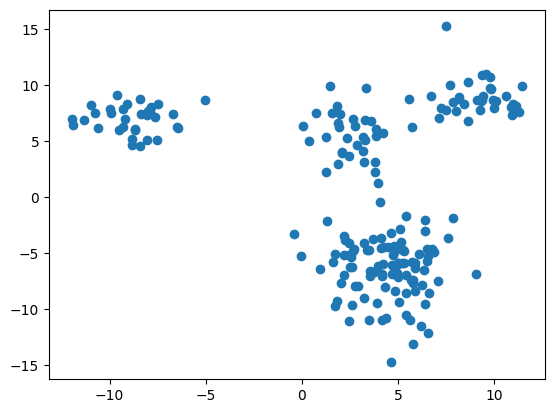

In [131]:
#I'd like to see clusters from the original dataset, 
#but I have asked for and still require further help.
#Instead, I'm going to create a new dataset to see some clusters.

#Create new dataset
from sklearn.datasets import make_blobs
dataset = make_blobs(n_samples=200,
                     centers=6,
                     n_features=3,
                     cluster_std=1.7,
                     random_state=13)
print(dataset)
#set points to the first column in dataset
points = dataset[0]

#kmeans objects were created above as km

#Fit the kmeans object to the dataset
kmeans.fit(points)

#plot the dataset
plt.scatter(dataset[0][:,0], dataset[0][:,1])

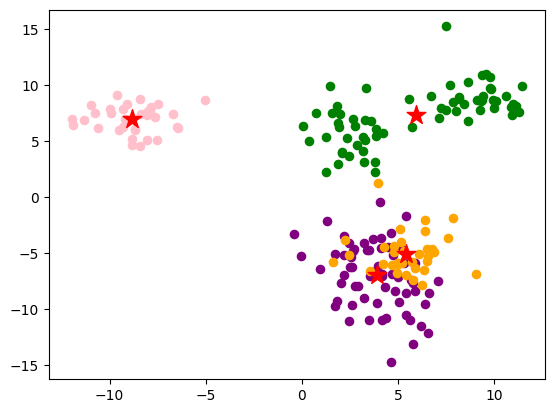

In [119]:
#make the cluster centers
clusters = kmeans.cluster_centers_
#print(clusters)

#Recalculate the positions of the vectors using the points dataset
fit_predict = kmeans.fit_predict(points)
#ensure that the fit_predict assigns each value one of the cluster values (0-3)
#print(fit_predict)
#looks good

#plot the clusters from fit_predict by color
plt.scatter(points[fit_predict == 0,0], points[fit_predict == 0,1], s = 35, color = 'purple')
plt.scatter(points[fit_predict == 1,0], points[fit_predict == 1,1], s = 35, color = 'pink')
plt.scatter(points[fit_predict == 2,0], points[fit_predict == 2,1], s = 35, color = 'green')
plt.scatter(points[fit_predict == 3,0], points[fit_predict == 3,1], s = 35, color = 'orange')

#also plot the centroids
plt.scatter(clusters[0][0], clusters [0][1], marker = '*', s = 200, color = 'red')
plt.scatter(clusters[1][0], clusters [1][1], marker = '*', s = 200, color = 'red')
plt.scatter(clusters[2][0], clusters [2][1], marker = '*', s = 200, color = 'red')
plt.scatter(clusters[3][0], clusters [3][1], marker = '*', s = 200, color = 'red')